<a href="https://colab.research.google.com/github/Ziad-o-Yusef/Deep-learning-notes/blob/main/12_Time_Classification_with_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle_MyAPI'
! kaggle datasets download -d gpiosenka/time-image-datasetclassification

 99% 381M/383M [00:22<00:00, 13.9MB/s]
100% 383M/383M [00:23<00:00, 17.5MB/s]


In [ ]:
! unzip /content/time-image-datasetclassification.zip

In [9]:
df = pd.read_csv('/content/clocks.csv')
df.head()

,class index,filepaths,labels,data set
0,0,train/1-00/0.jpg,1_00,train
1,0,train/1-00/1.jpg,1_00,train
2,0,train/1-00/11.jpg,1_00,train
3,0,train/1-00/12.jpg,1_00,train
4,0,train/1-00/13.jpg,1_00,train


In [10]:
df.tail()

,class index,filepaths,labels,data set
14395,143,valid/9-55/65.jpg,9_55,valid
14396,143,valid/9-55/74.jpg,9_55,valid
14397,143,valid/9-55/88.jpg,9_55,valid
14398,143,valid/9-55/90.jpg,9_55,valid
14399,143,valid/9-55/95.jpg,9_55,valid


In [12]:
train_df = df[df['data set'] == 'train' ]
train_df.head()

,class index,filepaths,labels,data set
0,0,train/1-00/0.jpg,1_00,train
1,0,train/1-00/1.jpg,1_00,train
2,0,train/1-00/11.jpg,1_00,train
3,0,train/1-00/12.jpg,1_00,train
4,0,train/1-00/13.jpg,1_00,train


In [29]:
test_df = df[df['data set'] != 'train' ]
test_df.reset_index(inplace = True)
test_df.drop(columns = ['index'],inplace = True)
test_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,class index,filepaths,labels,data set
0,0,test/1-00/10.jpg,1_00,test
1,0,test/1-00/31.jpg,1_00,test
2,0,test/1-00/38.jpg,1_00,test
3,0,test/1-00/50.jpg,1_00,test
4,0,test/1-00/53.jpg,1_00,test


In [26]:
len(train_df['labels'].unique())

144

In [34]:
print(train_df.shape)
print(test_df.shape)

(11520, 4)
(2880, 4)


In [32]:
img = cv2.imread('/content/train/1-55/1.jpg')
img.shape

(224, 224, 3)

In [28]:
len(train_df['labels'].unique())

144

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generation = ImageDataGenerator(rescale=1.0/255)

In [36]:
train_generation = data_generation.flow_from_directory(
                                        "/content/train",
                                        target_size=(38,38),
                                        batch_size=10,
                                        class_mode='categorical',
                                       color_mode = 'grayscale' )
test_generation = data_generation.flow_from_directory(
                                        "/content/test",
                                        target_size=(38,38),
                                        batch_size=10,
                                        class_mode='categorical',
                                        color_mode = 'grayscale')
val_generation = data_generation.flow_from_directory(
                                        "/content/valid",
                                        target_size=(38,38),
                                        batch_size=10,
                                        class_mode='categorical',
                                        color_mode = 'grayscale')

Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.


In [41]:
Model_1  = tf.keras.models.Sequential()
Model_1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(38,38,1),activation='relu',kernel_initializer='he_uniform',))
Model_1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_1.add(tf.keras.layers.BatchNormalization())
Model_1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_1.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_1.add(tf.keras.layers.Flatten())
Model_1.add(tf.keras.layers.Dense(1024,activation='relu'))
Model_1.add(tf.keras.layers.Dropout((0.5)))
Model_1.add(tf.keras.layers.Dense(144,activation='softmax'))

In [42]:
Model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 36, 36, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 35, 35, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 17, 17, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        8256      
                                                                 
 conv2d_11 (Conv2D)          (None, 15, 15, 128)      

In [43]:
Model_1.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [44]:
Model_1.fit_generator(train_generation,validation_data=test_generation,epochs=15)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


1152/1152 [==============================] - 33s 18ms/step - loss: 2.2953 - accuracy: 0.5747 - val_loss: 0.8381 - val_accuracy: 0.8174
Epoch 2/15
1152/1152 [==============================] - 22s 19ms/step - loss: 0.9137 - accuracy: 0.8075 - val_loss: 0.7455 - val_accuracy: 0.8479
Epoch 3/15
1152/1152 [==============================] - 21s 18ms/step - loss: 0.7886 - accuracy: 0.8307 - val_loss: 0.7111 - val_accuracy: 0.8542
Epoch 4/15
1152/1152 [==============================] - 21s 18ms/step - loss: 0.6393 - accuracy: 0.8560 - val_loss: 0.6997 - val_accuracy: 0.8583
Epoch 5/15
1152/1152 [==============================] - 21s 18ms/step - loss: 0.5001 - accuracy: 0.8857 - val_loss: 0.6584 - val_accuracy: 0.8674
Epoch 6/15
1152/1152 [==============================] - 21s 18ms/step - loss: 0.4396 - accuracy: 0.8977 - val_loss: 0.6582 - val_accuracy: 0.8757
Epoch 7/15
1152/1152 [==============================] - 21s 18ms/step - loss: 0.3616 - accuracy: 0.9151 - val_loss: 0.6644 - val_accura

In [45]:
Model_2  = tf.keras.models.Sequential()
Model_2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(38,38,1),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_2.add(tf.keras.layers.BatchNormalization())
Model_2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.BatchNormalization())
Model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_2.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.BatchNormalization())
Model_2.add(tf.keras.layers.Dropout((0.3)))
Model_2.add(tf.keras.layers.Flatten())
Model_2.add(tf.keras.layers.Dense(1024,activation='relu'))
Model_2.add(tf.keras.layers.Dropout((0.5)))
Model_2.add(tf.keras.layers.Dense(144,activation='softmax'))

In [46]:
Model_2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [47]:
Model_2.fit_generator(train_generation,validation_data=test_generation,epochs=15)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


1152/1152 [==============================] - 21s 17ms/step - loss: 3.2707 - accuracy: 0.3480 - val_loss: 1.4822 - val_accuracy: 0.6715
Epoch 2/15
1152/1152 [==============================] - 20s 17ms/step - loss: 1.4774 - accuracy: 0.6538 - val_loss: 0.8325 - val_accuracy: 0.8132
Epoch 3/15
1152/1152 [==============================] - 20s 18ms/step - loss: 1.0705 - accuracy: 0.7545 - val_loss: 0.7288 - val_accuracy: 0.8375
Epoch 4/15
1152/1152 [==============================] - 20s 17ms/step - loss: 0.9118 - accuracy: 0.7930 - val_loss: 0.6525 - val_accuracy: 0.8542
Epoch 5/15
1152/1152 [==============================] - 20s 17ms/step - loss: 0.7848 - accuracy: 0.8167 - val_loss: 0.5270 - val_accuracy: 0.8750
Epoch 6/15
1152/1152 [==============================] - 20s 17ms/step - loss: 0.7206 - accuracy: 0.8357 - val_loss: 0.4145 - val_accuracy: 0.8993
Epoch 7/15
1152/1152 [==============================] - 20s 18ms/step - loss: 0.6125 - accuracy: 0.8572 - val_loss: 0.4173 - val_accura

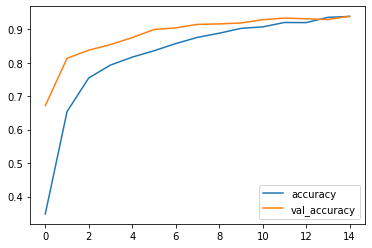

In [49]:
losse = pd.DataFrame(Model_2.history.history)
losse[['accuracy','val_accuracy']].plot()

In [53]:
Model_2  = tf.keras.models.Sequential()
Model_2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(38,38,1),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_2.add(tf.keras.layers.BatchNormalization())
Model_2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.BatchNormalization())
Model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_2.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.BatchNormalization())
Model_2.add(tf.keras.layers.Dropout((0.3)))
Model_2.add(tf.keras.layers.Flatten())
Model_2.add(tf.keras.layers.Dense(1024,activation='relu'))
Model_2.add(tf.keras.layers.Dropout((0.5)))
Model_2.add(tf.keras.layers.Dense(144,activation='softmax'))

In [54]:
Model_2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
Model_2.fit_generator(train_generation,validation_data=test_generation,epochs=100)

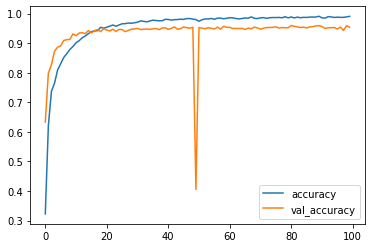

In [56]:
losse = pd.DataFrame(Model_2.history.history)
losse[['accuracy','val_accuracy']].plot()

In [61]:
Model_2.evaluate_generator(val_generation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.6758617758750916, 0.9402777552604675]

In [62]:
train_generation = data_generation.flow_from_directory(
                                        "/content/train",
                                        target_size=(64,64),
                                        batch_size=10,
                                        class_mode='categorical',
                                       color_mode = 'grayscale' )
test_generation = data_generation.flow_from_directory(
                                        "/content/test",
                                        target_size=(64,64),
                                        batch_size=10,
                                        class_mode='categorical',
                                        color_mode = 'grayscale')
val_generation = data_generation.flow_from_directory(
                                        "/content/valid",
                                        target_size=(64,64),
                                        batch_size=10,
                                        class_mode='categorical',
                                        color_mode = 'grayscale')

Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.


In [69]:
Model_3  = tf.keras.models.Sequential()
Model_3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,1),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_3.add(tf.keras.layers.BatchNormalization())
Model_3.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.BatchNormalization())
Model_3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_3.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.BatchNormalization())
Model_3.add(tf.keras.layers.Dropout((0.3)))
Model_3.add(tf.keras.layers.Flatten())
Model_3.add(tf.keras.layers.Dense(1024,activation='relu'))
Model_3.add(tf.keras.layers.Dropout((0.5)))
Model_3.add(tf.keras.layers.Dense(144,activation='softmax'))

In [70]:
Model_3.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
Model_3.fit_generator(train_generation,validation_data=test_generation,epochs=50)

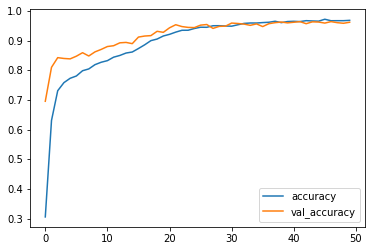

In [72]:
losse = pd.DataFrame(Model_3.history.history)
losse[['accuracy','val_accuracy']].plot()

In [73]:
Model_3.evaluate_generator(val_generation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.3150036334991455, 0.9430555701255798]